In [56]:
import numpy as np
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import sympy as sp

%matplotlib notebook

In [57]:
# График
def plot_graph(points):
    vertex = np.array([[0,0,0]
                       ,[1,0,0]
                       ,[0,1,0]
                       ,[1,1,0]
                       ,[0,0,1]
                       ,[1,0,1]
                       ,[0,1,1]
                       ,[1,1,1]])
    
    fig = plt.figure()
    ax = fig.add_subplot(1, 1, 1, projection='3d')
    r = [0,1]
    X, Y = np.meshgrid(r, r)
    one = np.ones(4).reshape(2, 2)

    ax.plot_wireframe(X,Y,one, alpha=0.5)
    ax.plot_wireframe(X,Y,-one + 1, alpha=0.5)
    ax.plot_wireframe(X,-one + 1,Y, alpha=0.5)
    ax.plot_wireframe(X,one,Y, alpha=0.5)
    ax.plot_wireframe(one,X,Y, alpha=0.5)
    ax.plot_wireframe(-one + 1,X,Y, alpha=0.5)

    ax.scatter3D(vertex[:, 0], vertex[:, 1], vertex[:, 2])

    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    ax.set_zlabel('Z')
    
    if len(points) != 0:
        ax.scatter(points[:, 0], points[:, 1], points[:, 2], c='red', s=50)
        ax.plot_trisurf(points[:, 0], points[:, 1], points[:, 2], alpha = 0.7, color = 'grey')

    fig.set_figwidth(10)     
    fig.set_figheight(10)

    plt.show()

In [58]:
x,y,z = sp.symbols("x y z")
    
M = np.array([[0, 1, 1.25],
            [0, -0.5, 0],
            [1.2, 0, -1]])

<IPython.core.display.Javascript object>


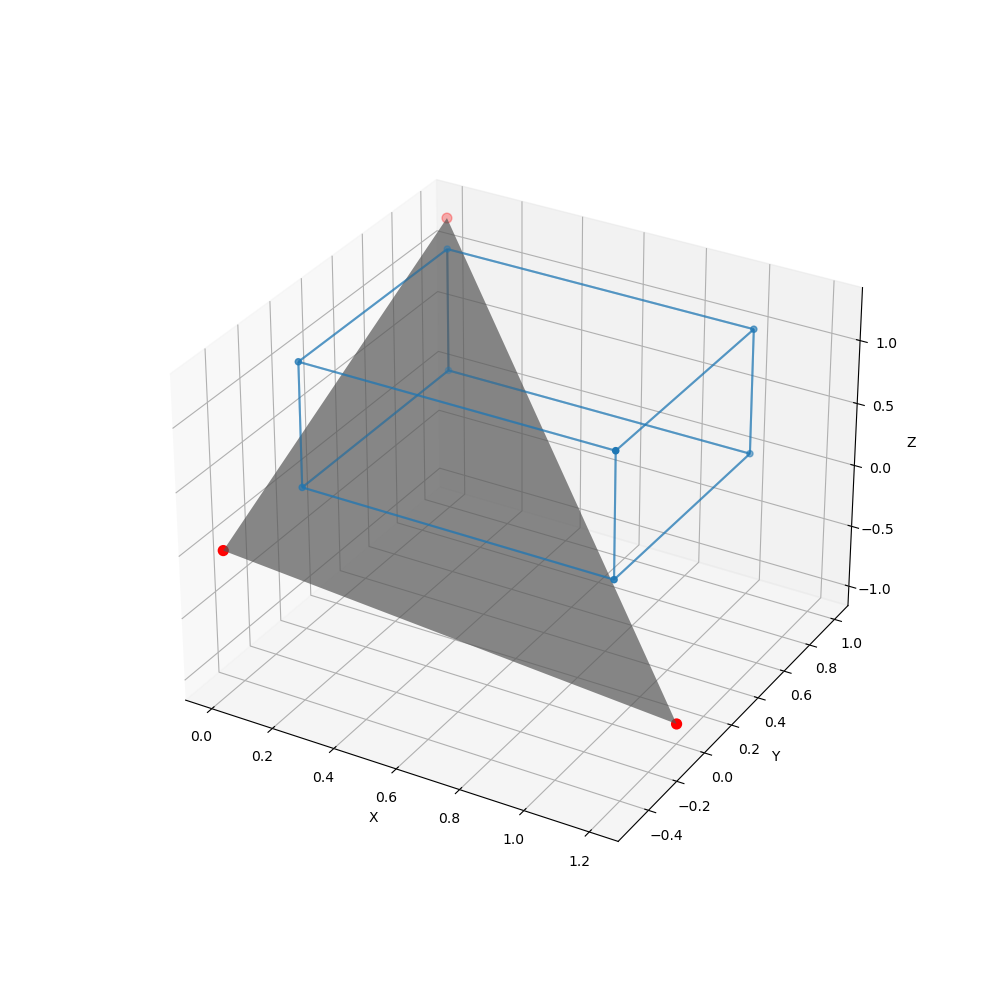

In [59]:
plot_graph(M)

In [60]:
if np.linalg.det(M) == 0: # Проверка на коллинеарность
    print("точки лежат на 1 прямой") 
else:
    A = (M[1][1] - M[0][1])*(M[2][2] - M[0][2]) - (M[2][1] - M[0][1])*(M[1][2] - M[0][2])
    B =  - (M[1][0] - M[0][0])*(M[2][2] - M[0][2]) + (M[2][0] - M[0][0])*(M[1][2] - M[0][2])
    C = (M[1][0] - M[0][0])*(M[2][1] - M[0][1]) - (M[2][0] - M[0][0])*(M[1][1] - M[0][1])
    f = A * x + B * y + C * z
    D = - f.subs({x:M[0][0], y:M[0][1], z:M[0][2]})
        
    f = A * x + B * y + C * z + D # Уранвнение плоскости 3 точек, заданных в начале
f

2.125*x - 1.5*y + 1.8*z - 0.75

In [61]:
# Расположение плоскости относительно вершин куба

vertex_cube = np.array([[0,0,0]
                       ,[1,0,0]
                       ,[0,1,0]
                       ,[1,1,0]
                       ,[0,0,1]
                       ,[1,0,1]
                       ,[0,1,1]
                       ,[1,1,1]])

sign_vertex = np.array([np.sign(f.subs({x: i[0], y: i[1], z: i[2]})) for i in vertex_cube])
sign_vertex

array([-1,  1, -1, -1,  1,  1, -1,  1])

In [65]:
# Точки пересечения с ребрами куба

def find_points(a,b):
    lam = abs(f.subs({x : a[0], y : a[1], z : a[2]}) / 
                   f.subs({x : b[0], y : b[1], z : b[2]}))
    p_x = (a[0] + lam * b[0]) / (1 + lam)
    p_y = (a[1] + lam * b[1]) / (1 + lam)
    p_z = (a[2] + lam * b[2]) / (1 + lam)
    
    return [p_x, p_y, p_z]


main_points = list()
for i in range(4):
    if sign_vertex[i] * sign_vertex[4 + i] < 0:
        main_points.append(find_points(vertex_cube[i], vertex_cube[i + 4]))
    if sign_vertex[2 * i] * sign_vertex[2 * i + 1] < 0:
        main_points.append(find_points(vertex_cube[2 * i], vertex_cube[2 * i + 1]))
    if sign_vertex[i] == 0:
        main_points.append(vertex_cube[i])
    if sign_vertex[i + 4] == 0:
        main_points.append(vertex_cube[4 + i])
for i in range(2):
    if sign_vertex[i] * sign_vertex[i + 2] < 0:
        main_points.append(find_points(vertex_cube[i], vertex_cube[i + 2]))
    if sign_vertex[i + 4] * sign_vertex[i + 6] < 0:
        main_points.append(find_points(vertex_cube[i + 4], vertex_cube[i + 6]))
        
print('Точки пересечения с ребрами куба:')
for i in range(len(main_points)):
    for j in range(3):
        print(f"{float(main_points[i][j]):.3f}", end = " ")
    print()

Точки пересечения с ребрами куба:
0.000 0.000 0.417 
0.353 0.000 0.000 
1.000 1.000 0.069 
0.212 1.000 1.000 
0.000 0.700 1.000 
1.000 0.917 0.000 


<IPython.core.display.Javascript object>


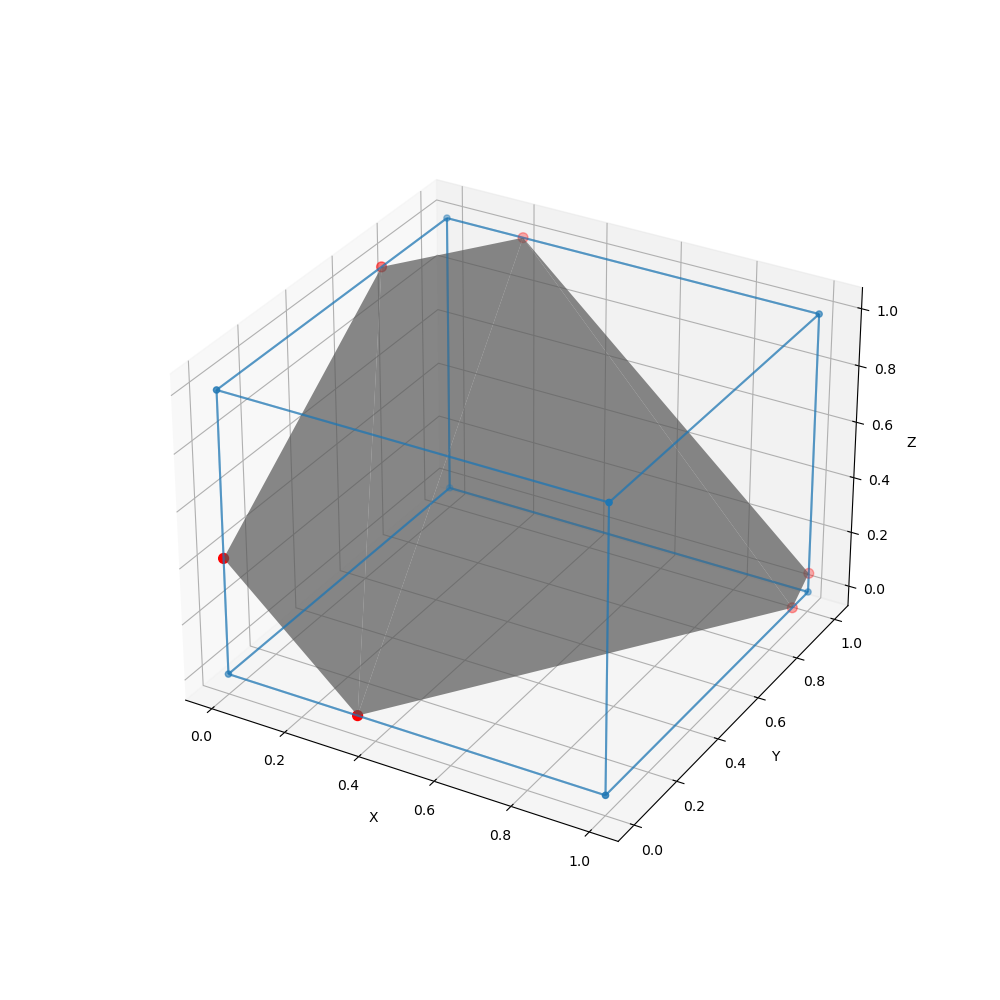

In [66]:
plot_graph(np.array(main_points, float))